Spam SMS Detection
Using Word Embeddings,
Algorithm Category : Supervised Learning,
Algorithm Name : Support Vector Machine(SVM)

1) Importing Necessary Libraries Numpy, Pandas, Sci-kit Learn, Matplotlib

In [39]:
# Utitlity Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt

# Algorithm, Evaluation, and Model Libraries
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2) Data Gathering from kaggle https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

3) Loading DataSet using Pandas 

In [40]:
# Importing Dataset
df = pd.read_csv('C:\\Users\\PramelaRaaj\\spam.csv',encoding='latin-1')

SVM takes labelled data as input(v1) v1 - Label,v2 - Message

In [13]:
#printing data
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [41]:
#sum of null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [42]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [14]:
#printing 1st 5 rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
#printing last 5 rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [16]:
#printing information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [50]:
#getting shape
df.shape

(5572, 5)

4) Data Cleaning - As we could see unwanted data (Unnamed 2,Unnamed 3,Unnamed 4)

In [17]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [18]:
#Data Cleaned
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


SMS Category - Binary(Spam,Legitimate),
Spam takes up the binary value 1, Ham takes up the binary value 0

In [19]:
df['Category'] = df.v1.map({'ham' : 0, 'spam' : 1})

In [20]:
df

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


5) Split the Dataset as Training Data (80%) and Testing Data (20%)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df['v2'], df['Category'], test_size=0.2, random_state=1)

In [22]:
#x_train data contains Messages to be trained 
x_train

1642                             Sleeping nt feeling well
2899    Come aftr  &lt;DECIMAL&gt; ..now i m cleaning ...
480                          Almost there, see u in a sec
3485                     Yeah, probably earlier than that
157     Hello, my love. What are you doing? Did you ge...
                              ...                        
905     Hey what's up charles sorry about the late reply.
5192    Oh oh... Den muz change plan liao... Go back h...
3980    Huh i cant thk of more oredi how many pages do...
235     I have printed it oh. So  &lt;#&gt;  come upst...
5157                              K k:) sms chat with me.
Name: v2, Length: 4457, dtype: object

In [23]:
#x_test data contains Messages to be validated
x_test

1078                             Convey my regards to him
4028             [Û_] anyway, many good evenings to u! s
958     My sort code is  and acc no is . The bank is n...
4642                          Sorry i din lock my keypad.
4674    Hi babe its Chloe, how r u? I was smashed on s...
                              ...                        
324                        No problem. How are you doing?
1163    New Theory: Argument wins d SITUATION, but los...
86      For real when u getting on yo? I only need 2 m...
4214                           No dear i was sleeping :-P
90      Yeah do! DonÛ÷t stand to close tho- youÛ÷ll ...
Name: v2, Length: 1115, dtype: object

In [24]:
#y_train data contains Category to be trained 
y_train

1642    0
2899    0
480     0
3485    0
157     0
       ..
905     0
5192    0
3980    0
235     0
5157    0
Name: Category, Length: 4457, dtype: int64

In [25]:
#y_test data contains Category to be trained 
y_test

1078    0
4028    0
958     0
4642    0
4674    1
       ..
324     0
1163    0
86      0
4214    0
90      0
Name: Category, Length: 1115, dtype: int64

In [26]:
#prints total no of rows in category of v1
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

CountVectorizer() : to transform a given Messages into a vector on the basis of the frequency of each word that occurs in the entire message

In [27]:
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)   

6) Generating Model

In [28]:
from sklearn import svm

In [29]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',random_state = 0) # Linear Kernel,#Non-linear

#Train the model--fit
clf.fit(train_data, y_train)

#Predict the response
svmpred = clf.predict(test_data)


7) Model Evaluation using Metrics(Accuracy , Precision , Recall , F1 score)

In [30]:

print("Accuracy using SVM model :{} %".format(accuracy_score(y_test, svmpred) * 100))
print("Precision using SVM model :{} %". format(precision_score(y_test, svmpred)* 100))
print("Recall using SVM model :{} %" . format(recall_score(y_test,svmpred)* 100))
print("F1 score using SVM model :{} %" . format(f1_score(y_test,svmpred)* 100))

Accuracy using SVM model :99.01345291479821 %
Precision using SVM model :99.23076923076923 %
Recall using SVM model :92.80575539568345 %
F1 score using SVM model :95.91078066914498 %


Accuracy of SVM clasifier:99.01345291479821%

 [[975   1]
 [ 10 129]]


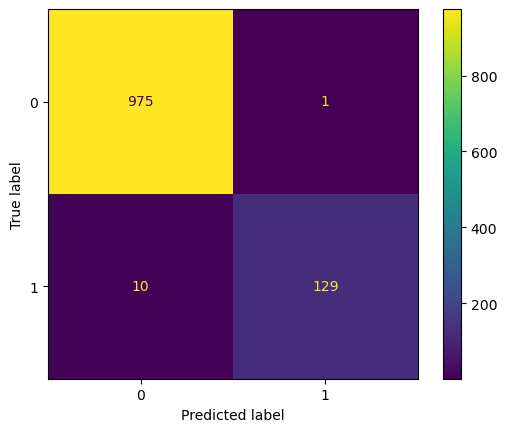

In [31]:
confusionmatrix = confusion_matrix(y_test, svmpred)
print("Accuracy of SVM clasifier:{}%".format(accuracy_score(y_test, svmpred) * 100))
print("\n", confusionmatrix)
conf = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
conf.plot()
plt.show()

In [36]:
cm = np.array(confusion_matrix(y_test,svmpred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Spam', 'Legitimate'],columns=['Predicted spam','Predicted Legitimate'])
confusion

,Predicted spam,Predicted Legitimate
Spam,129,10
Legitimate,1,975


In [37]:
print("Classification Report")
print(classification_report(y_test,svmpred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.99      0.93      0.96       139

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



8) Data Visualization using Bar Chart

<BarContainer object of 2 artists>

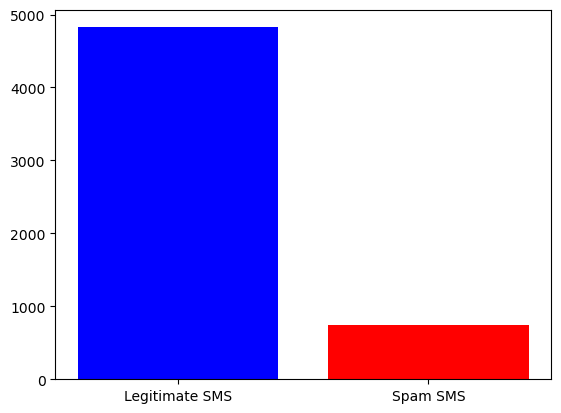

In [49]:
count_Class = pd.value_counts(df.v1, sort = True)

# Data to Plot
labels = 'Legitimate SMS', 'Spam SMS'
sizes = [count_Class[0], count_Class[1]]
colors = ['blue', 'red']
explode = (0.1, 0.1)

# Plot
plt.bar(labels,sizes,color=colors)